<a href="https://colab.research.google.com/github/JonAbaroa/PANDAS/blob/main/Codeacademy_2_Learn_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aggregates in Pandas**

Learn the basics of aggregate functions in Pandas, which let us calculate quantities that describe groups of data.

# **Lesson - Aggregates in Pandas**

## **Introduction**

This lesson you will learn about aggregates in Pandas. An aggregate statistic is a way of creating a single number that describes a group of numbers. Common aggregate statistics include mean, median, or standard deviation.

You will also learn how to rearrange a DataFrame into a pivot table, which is a great way to compare data across two dimensions.

In [ ]:
# Before we analyze anything, we need to import pandas
# and load our data

import pandas as pd

xlsx = pd.ExcelFile("bspandas.xlsx")
print(xlsx.sheet_names)

['bspandas2.2', 'bspandas2.3']


In [ ]:
df.head()

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0
2,43416,Keith,Saunders,KS4047@gmail.com,sandles,leather,navy,346.0
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandles,fabric,brown,344.0
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0


In [ ]:
df2=xlsx.parse("bspandas2.2")
print(df2)

      id first_name    last_name  ... shoe_material shoe_color  price
0  41874       Kyle         Peck  ...  faux-leather      black  385.0
1  31349  Elizabeth    Velazquez  ...        fabric      brown  388.0
2  43416      Keith     Saunders  ...       leather       navy  346.0
3  56054       Ryan      Sweeney  ...        fabric      brown  344.0
4  77402      Donna  Blankenship  ...        fabric      brown  289.0
5  97148     Albert       Dillon  ...        fabric      brown  266.0
6  19998     Judith       Hewitt  ...       leather      black  395.0
7  83290      Kayla       Hardin  ...       leather      white  241.0
8  77867     Steven  Blankenship  ...       leather       navy  266.0
9  54885      Carol   Mclaughlin  ...  faux-leather      brown  440.0

[10 rows x 8 columns]


In [ ]:
df2.head(1)

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0


In [ ]:
df3=xlsx.parse("bspandas2.3")
print(df3)

      id first_name  ...         month utm_source
0  10043      Louis  ...     3 - March      yahoo
1  10150      Bruce  ...     3 - March    twitter
2  10155   Nicholas  ...  2 - February     google
3  10178    William  ...     3 - March      yahoo
4  10208      Karen  ...  2 - February     google
5  10260   Benjamin  ...   1 - January    twitter
6  10271     Gerald  ...     3 - March     google
7  10278    Melissa  ...  2 - February      email
8  10320       Adam  ...     3 - March      email
9  10389      Ethan  ...  2 - February   facebook

[10 rows x 6 columns]


In [ ]:
df3.head(1)

,id,first_name,last_name,email,month,utm_source
0,10043,Louis,Koch,LouisKoch43@gmail.com,3 - March,yahoo


## **Calculating Column Statistics**

In the previous lesson, you learned how to perform operations on each value in a column using apply.

In this exercise, you will learn how to combine all of the values from a column for a single calculation.

In [ ]:
import pandas as pd

xlsx = pd.ExcelFile("bspandas.xlsx")

orders=xlsx.parse("bspandas2.2")
print(orders.head(1))

      id first_name last_name  ... shoe_material shoe_color  price
0  41874       Kyle      Peck  ...  faux-leather      black  385.0

[1 rows x 8 columns]


In [ ]:
orders.head(10)

,id,first_name,last_name,email,shoe_type,shoe_material,shoe_color,price
0,41874,Kyle,Peck,KylePeck71@gmail.com,ballet flats,faux-leather,black,385.0
1,31349,Elizabeth,Velazquez,EVelazquez1971@gmail.com,boots,fabric,brown,388.0
2,43416,Keith,Saunders,KS4047@gmail.com,sandles,leather,navy,346.0
3,56054,Ryan,Sweeney,RyanSweeney14@outlook.com,sandles,fabric,brown,344.0
4,77402,Donna,Blankenship,DB3807@gmail.com,stilettos,fabric,brown,289.0
5,97148,Albert,Dillon,Albert.Dillon@gmail.com,wedges,fabric,brown,266.0
6,19998,Judith,Hewitt,JudithHewitt98@gmail.com,stilettos,leather,black,395.0
7,83290,Kayla,Hardin,Kayla.Hardin@gmail.com,stilettos,leather,white,241.0
8,77867,Steven,Blankenship,Steven.Blankenship@gmail.com,wedges,leather,navy,266.0
9,54885,Carol,Mclaughlin,CM3415@gmail.com,ballet flats,faux-leather,brown,440.0


In [ ]:
most_expensive = orders.price.max()
num_colors = orders.shoe_color.nunique()

In [ ]:
most_expensive

440.0

In [ ]:
num_colors

4

In [ ]:
print(orders.price.mean()) # Average of all values in column
print(orders.price.std()) # Standard deviation of column
print(orders.price.median()) # Median value of column
print(orders.price.max()) # Maximum value in column
print(orders.price.min()) # Minimum value in column
print(orders.price.count()) # Number of values in column
print(orders.price.nunique()) # Number of unique values in column
print(orders.price.unique()) # List of unique values in column

336.0
67.16480559869962
345.0
440.0
241.0
10
9
[385. 388. 346. 344. 289. 266. 395. 241. 440.]


## **Calculating Aggregate Functions I**

When we have a bunch of data, we often want to calculate aggregate statistics (mean, standard deviation, median, percentiles, etc.) over certain subsets of the data.

In [ ]:
pricey_shoes = orders.groupby('shoe_type').price.max()

print(pricey_shoes)


shoe_type
ballet flats    440.0
boots           388.0
sandles         346.0
stilettos       395.0
wedges          266.0
Name: price, dtype: float64


In [ ]:
print(type(pricey_shoes))

<class 'pandas.core.series.Series'>


## **Calculating Aggregate Functions II -  reset_index**

After using groupby, we often need to clean our resulting data.

In [ ]:
pricey_shoes = orders.groupby('shoe_type').price.max().reset_index()

print(pricey_shoes)

print(type(pricey_shoes))

      shoe_type  price
0  ballet flats  440.0
1         boots  388.0
2       sandles  346.0
3     stilettos  395.0
4        wedges  266.0
<class 'pandas.core.frame.DataFrame'>


## **Calculating Aggregate Functions III - percentiles**

 Sometimes, the operation that you want to perform is more complicated than mean or count. In those cases, you can use the apply method and lambda functions, just like we did for individual column operations. Note that the input to our lambda function will always be a list of values.

A great example of this is calculating percentiles. Suppose we have a DataFrame of employee information called df that has the following columns:

id: the employee’s id number

name: the employee’s name

wage: the employee’s hourly wage

category: the type of work that the employee does

In [ ]:
import numpy as np
import pandas as pd

xlsx = pd.ExcelFile("bspandas.xlsx")

orders=xlsx.parse("bspandas2.2")
print(orders.head(1))

      id first_name last_name  ... shoe_material shoe_color  price
0  41874       Kyle      Peck  ...  faux-leather      black  385.0

[1 rows x 8 columns]


In [ ]:
cheap_shoes = orders.groupby('shoe_color').price.apply(lambda x: np.percentile(x, 25)).reset_index()

print(cheap_shoes)

  shoe_color  price
0      black  387.5
1      brown  289.0
2       navy  286.0
3      white  241.0


## **Calculating Aggregate Functions IV**

 Sometimes, we want to group by more than one column. We can easily do this by passing a list of column names into the groupby method.

In [ ]:
import numpy as np
import pandas as pd

xlsx = pd.ExcelFile("bspandas.xlsx")

orders=xlsx.parse("bspandas2.2")

shoe_counts = orders.groupby(['shoe_type', 'shoe_color']).id.count().reset_index()

print(shoe_counts)

      shoe_type shoe_color  id
0  ballet flats      black   1
1  ballet flats      brown   1
2         boots      brown   1
3       sandles      brown   1
4       sandles       navy   1
5     stilettos      black   1
6     stilettos      brown   1
7     stilettos      white   1
8        wedges      brown   1
9        wedges       navy   1


## **Pivot Tables**

When we perform a groupby across multiple columns, we often want to change how our data is stored.

In [ ]:
import numpy as np
import pandas as pd

xlsx = pd.ExcelFile("bspandas.xlsx")

orders=xlsx.parse("bspandas2.2")

shoe_counts = orders.groupby(['shoe_type', 'shoe_color']).id.count().reset_index()

shoe_counts_pivot = shoe_counts.pivot(
  columns = 'shoe_color',
  index = 'shoe_type',
  values = 'id').reset_index()

print(shoe_counts_pivot)

shoe_color     shoe_type  black  brown  navy  white
0           ballet flats    1.0    1.0   NaN    NaN
1                  boots    NaN    1.0   NaN    NaN
2                sandles    NaN    1.0   1.0    NaN
3              stilettos    1.0    1.0   NaN    1.0
4                 wedges    NaN    1.0   1.0    NaN


## **Review**

This lesson introduced you to aggregates in Pandas. You learned:

How to perform aggregate statistics over individual rows with the same value using groupby.
How to rearrange a DataFrame into a pivot table, a great way to compare data across two dimensions.

In [ ]:
import pandas as pd

xlsx = pd.ExcelFile("bspandas.xlsx")

user_visits=xlsx.parse("bspandas2.3")

In [ ]:
# Part 1.
print(user_visits.head(10))

      id first_name  ...         month utm_source
0  10043      Louis  ...     3 - March      yahoo
1  10150      Bruce  ...     3 - March    twitter
2  10155   Nicholas  ...  2 - February     google
3  10178    William  ...     3 - March      yahoo
4  10208      Karen  ...  2 - February     google
5  10260   Benjamin  ...   1 - January    twitter
6  10271     Gerald  ...     3 - March     google
7  10278    Melissa  ...  2 - February      email
8  10320       Adam  ...     3 - March      email
9  10389      Ethan  ...  2 - February   facebook

[10 rows x 6 columns]


In [ ]:
user_visits.head(1)

,id,first_name,last_name,email,month,utm_source
0,10043,Louis,Koch,LouisKoch43@gmail.com,3 - March,yahoo


In [ ]:
# Part 2.
click_source = user_visits.groupby('utm_source').id.count().reset_index()

#Part 3.
print(click_source)

  utm_source  id
0      email   2
1   facebook   1
2     google   3
3    twitter   2
4      yahoo   2


In [ ]:
#Part 4.
click_source_by_month = user_visits.groupby(['utm_source', 'month']).id.count().reset_index()

print(click_source_by_month)

  utm_source         month  id
0      email  2 - February   1
1      email     3 - March   1
2   facebook  2 - February   1
3     google  2 - February   2
4     google     3 - March   1
5    twitter   1 - January   1
6    twitter     3 - March   1
7      yahoo     3 - March   2


In [ ]:
#Part 5.
click_source_by_month_pivot = click_source_by_month.pivot(
	columns = 'month',
	index = 'utm_source',
	values = 'id').reset_index()
 
 #Part 6.
print(click_source_by_month_pivot)

month utm_source  1 - January  2 - February  3 - March
0          email          NaN           1.0        1.0
1       facebook          NaN           1.0        NaN
2         google          NaN           2.0        1.0
3        twitter          1.0           NaN        1.0
4          yahoo          NaN           NaN        2.0


# **Quiz - Aggregates in Pandas**

# **Project - A/B Testing for ShoeFly.com**

# **Ficha Tecnica - Cheatsheet**

In [ ]:
df = pd.DataFrame([
  ["Amy","Assignment 1",75],
  ["Amy","Assignment 2",35],
  ["Bob","Assignment 1",99],
  ["Bob","Assignment 2",35]
  ], columns=["Name", "Assignment", "Grade"])

df.groupby('Name').Grade.mean()

# output of the groupby command
|Name | Grade|
| -  | - |
|Amy | 55|
|Bob |  67|

df.columnName.mean() # Average of all values in column
df.columnName.std() # Standard deviation of column
df.columnName.median() # Median value of column
df.columnName.max() # Maximum value in column
df.columnName.min() # Minimum value in column
df.columnName.count() # Number of values in column
df.columnName.nunique() # Number of unique values in column
df.columnName.unique() # List of unique values in column

SyntaxError: ignored

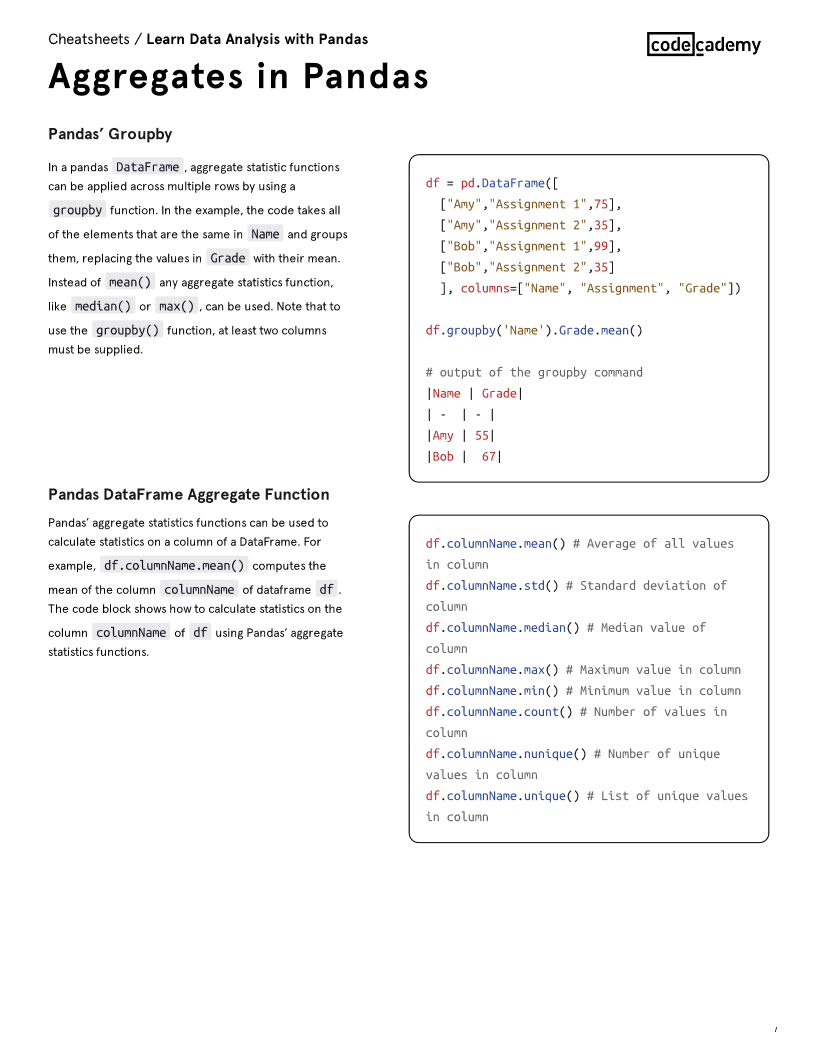